In [9]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit
from gplearn.genetic import SymbolicRegressor

In [8]:
from sklearn.ensemble import RandomForestRegressor

# Обучаем случайный лес
model = RandomForestRegressor(n_estimators=100)
model.fit(x, y)

# Предсказания
y_pred = model.predict(x)


ValueError: Expected 2D array, got 1D array instead:
array=[ 1.         1.0909091  1.1818181  1.2727273  1.3636364  1.4545455
  1.5454545  1.6363636  1.7272727  1.8181819  1.9090909  2.
  2.090909   2.1818182  2.2727273  2.3636363  2.4545455  2.5454545
  2.6363637  2.7272727  2.8181818  2.909091   3.         3.090909
  3.1818182  3.2727273  3.3636363  3.4545455  3.5454545  3.6363637
  3.7272727  3.8181818  3.909091   4.         4.090909   4.181818
  4.2727275  4.3636365  4.4545455  4.5454545  4.6363635  4.7272725
  4.818182   4.909091   5.         5.090909   5.181818   5.2727275
  5.3636365  5.4545455  5.5454545  5.6363635  5.7272725  5.818182
  5.909091   6.         6.090909   6.181818   6.2727275  6.3636365
  6.4545455  6.5454545  6.6363635  6.7272725  6.818182   6.909091
  7.         7.090909   7.181818   7.2727275  7.3636365  7.4545455
  7.5454545  7.6363635  7.7272725  7.818182   7.909091   8.
  8.090909   8.181818   8.272727   8.363636   8.454545   8.545455
  8.636364   8.727273   8.818182   8.909091   9.         9.090909
  9.181818   9.272727   9.363636   9.454545   9.545455   9.636364
  9.727273   9.818182   9.909091  10.       ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    48.21        2.009e+07      127          1.04511          1.94833      1.32m
   1    12.04          19.9109       19          1.02105           1.4469     48.29s
   2     5.82          56.0163        5           1.0337          2.03813     42.54s
   3     3.16          1042.68        3          1.04318          1.96572     40.24s
   4     2.03          13.6461        1          1.03501          1.96408     34.94s
   5     1.67           11.158        3          1.03369          2.05111     32.45s
   6     1.60          10.5492        1           1.0405          1.98606     29.82s
   7     1.54          233.108        1          1.02925          2.01634     27.69s
   8     1.55          3.59099        1          1.04055          1.91414  

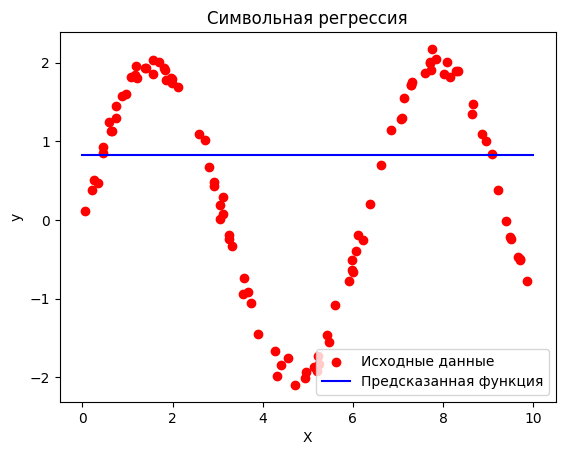

Найденная функция: 0.825


In [10]:
# Генерация синтетических данных
np.random.seed(42)
X = np.sort(10 * np.random.rand(100, 1), axis=0)
y = 2 * np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])  # Целевая функция с шумом

# Создание и обучение модели символьной регрессии
est = SymbolicRegressor(population_size=5000, 
                        generations=20, 
                        stopping_criteria=0.01,
                        p_crossover=0.7, 
                        p_subtree_mutation=0.1,
                        p_hoist_mutation=0.05, 
                        p_point_mutation=0.1,
                        max_samples=0.9, 
                        verbose=1, 
                        parsimony_coefficient=0.01,
                        random_state=42)

est.fit(X, y)

# Предсказание значений и вывод результата
x_test = np.linspace(0, 10, 100).reshape(-1, 1)
y_pred = est.predict(x_test)

plt.scatter(X, y, label="Исходные данные", color='red')
plt.plot(x_test, y_pred, label="Предсказанная функция", color='blue')
plt.legend()
plt.xlabel("X")
plt.ylabel("y")
plt.title("Символьная регрессия")
plt.show()

# Вывод найденной функции
print("Найденная функция:", est._program)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    48.10      2.31127e+07        7          1.03055          1.90893      6.88m
   1    20.54          58.2511       29          0.98348          1.19328      4.69m
   2    12.83          15.4806       41         0.916943          1.02634      4.31m
   3    13.48          10.5118       61         0.914401          1.34421      4.14m
   4    22.60          44.2323       51          0.87397          1.62763      4.53m
   5    41.68          32.9201       63         0.870097          1.65907      5.36m
   6    46.18          18.2753       59         0.841357          1.21534      5.44m
   7    44.72          22.8669       59         0.830526          1.28077      5.35m
   8    42.89          61.0489      111         0.839626          1.12108  

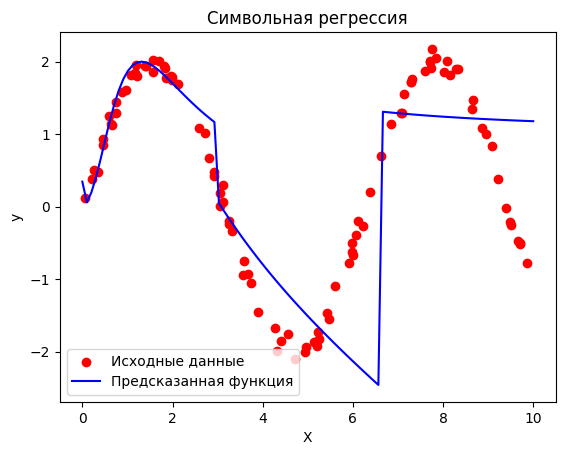

Найденная функция: div(sub(add(sub(div(X0, -0.316), sub(X0, -0.411)), div(X0, add(0.335, -0.506))), add(mul(div(-0.003, mul(div(-0.003, -0.355), mul(div(mul(div(-0.003, mul(X0, X0)), mul(X0, mul(sub(div(0.808, -0.590), mul(X0, X0)), X0))), div(-0.003, X0)), div(0.784, X0)))), mul(X0, mul(X0, X0))), mul(X0, X0))), mul(sub(div(sub(0.834, -0.933), X0), sub(0.132, X0)), sub(div(0.808, -0.590), mul(X0, X0))))


In [13]:
# Генерация синтетических данных
np.random.seed(42)
X = np.sort(10 * np.random.rand(100, 1), axis=0)
y = 2 * np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])  # Целевая функция с шумом

# Изменение параметров
est = SymbolicRegressor(population_size=10000,   # Увеличение популяции
                        generations=50,          # Увеличение числа поколений
                        stopping_criteria=0.01,
                        p_crossover=0.8,         # Увеличение вероятности кроссовера
                        p_subtree_mutation=0.1,  # Оставляем ту же вероятность мутации
                        p_hoist_mutation=0.05,   # Тоже
                        p_point_mutation=0.05,   # Уменьшение вероятности точечной мутации
                        max_samples=0.9,
                        verbose=1,
                        parsimony_coefficient=0.001,  # Уменьшение коэффициента парсимонии
                        random_state=42)

# Обучение модели
est.fit(X, y)

# Предсказания
y_pred = est.predict(x_test)

# Визуализация
plt.scatter(X, y, label="Исходные данные", color='red')
plt.plot(x_test, y_pred, label="Предсказанная функция", color='blue')
plt.legend()
plt.xlabel("X")
plt.ylabel("y")
plt.title("Символьная регрессия")
plt.show()

# Вывод функции
print("Найденная функция:", est._program)